In [1]:
import numpy as np
import matplotlib.pyplot as plt

import random
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
def create_pairs(x, digit_indices):
    '''Positive and negative pair creation.
    Alternates between positive and negative pairs.
    '''
    pairs = []
    labels = []
    n = min([len(digit_indices[d]) for d in range(num_classes)]) - 1
    for d in range(num_classes):
        for i in range(n):
            z1, z2 = digit_indices[d][i], digit_indices[d][i + 1]
            pairs += [[x[z1], x[z2]]]
            inc = random.randrange(1, num_classes)
            dn = (d + inc) % num_classes
            z1, z2 = digit_indices[d][i], digit_indices[dn][i]
            pairs += [[x[z1], x[z2]]]
            labels += [1, 0]
    return np.array(pairs), np.array(labels)

In [3]:
num_classes = 10
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255
input_shape = x_train.shape[1:]

# create training+test positive and negative pairs
digit_indices = [np.where(y_train == i)[0] for i in range(num_classes)]
tr_pairs, tr_y = create_pairs(x_train, digit_indices)

digit_indices = [np.where(y_test == i)[0] for i in range(num_classes)]
te_pairs, te_y = create_pairs(x_test, digit_indices)

In [4]:
input_shape

(28, 28)

1


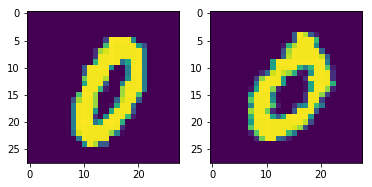

In [5]:
# change index to visualize pairs
# negative (dissimilar) pairs labeled as 0
# positive (similar) pairs labeled as 1
i = 4
print(tr_y[i])

plt.subplot(121)
plt.imshow(tr_pairs[i][0])

plt.subplot(122)
plt.imshow(tr_pairs[i][1])

0


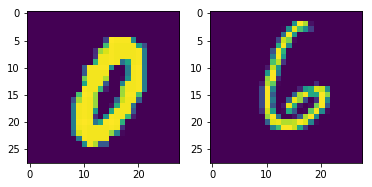

In [6]:
# change index to visualize pairs
# negative (dissimilar) pairs labeled as 0
# positive (similar) pairs labeled as 1
i = 5
print(tr_y[i])

plt.subplot(121)
plt.imshow(tr_pairs[i][0])

plt.subplot(122)
plt.imshow(tr_pairs[i][1])

In [ ]:
# Build an ML algorithm do detect similar and dissimilar inputs.
# HINTS: You can find several functions as hints down below.

## HINT

In [7]:
from keras import backend as K
def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    margin = 1
    sqaure_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * sqaure_pred + (1 - y_true) * margin_square)

def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

def accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))